### Pooling Layers and Dimensionality Reduction

## Introduction to Pooling Layers

Pooling layers are essential components in convolutional neural networks (CNNs). They are used to reduce the spatial dimensions (height and width) of feature maps while retaining the most important information. This process helps make the network more computationally efficient and robust to variations in the input.

### Types of Pooling

- **Max Pooling:**  
    Selects the maximum value from each region (window) of the input feature map.  
    - Captures the strongest activations.
    - Helps highlight prominent features and edges.
    - Commonly used in practice due to its effectiveness in feature extraction.

- **Average Pooling:**  
    Computes the average value for each region of the input feature map.  
    - Provides a more generalized summary of features.
    - Can be useful when the presence of a feature is less important than its average effect.

### Role of Pooling in Reducing Dimensionality

- **Dimensionality Reduction:**  
    Pooling reduces the spatial dimensions (height and width) of feature maps, resulting in fewer parameters and faster computations. This helps prevent overfitting and reduces the computational load.

- **Robustness:**  
    Pooling makes the model invariant to small translations, distortions, or noise in the input image. This means that minor changes in the input do not significantly affect the pooled output, improving the model's generalization.

### Combining Convolution and Pooling Layers

Pooling layers typically follow convolutional layers to downsample the feature maps. This combination helps extract hierarchical features from the input data:

- **Early Layers:** Focus on detecting simple features such as edges, colors, and textures.
- **Deeper Layers:** Capture more complex patterns and high-level representations.

By alternating convolution and pooling layers, CNNs can learn increasingly abstract and informative features, leading to better performance on tasks such as image classification and object detection.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, uniform_filter


creeate a sample feeature map

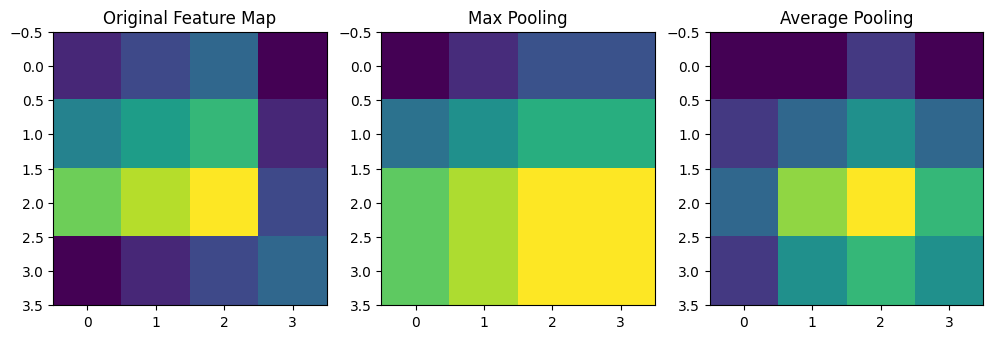

In [14]:
feature_map = np.array([
    [1,2,3,0],
    [4,5,6,1],
    [7,8,9,2],
    [0,1,2,3]
])

# max pooling (2X2)
max_pooled = maximum_filter(feature_map, size =2, mode='constant')

# average pooling (2X2)
avg_pooled = uniform_filter(feature_map, size=2, mode='constant')

# plot 
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(feature_map, cmap='viridis')
axes[0].set_title('Original Feature Map')
axes[1].imshow(max_pooled, cmap='viridis')
axes[1].set_title('Max Pooling')
axes[2].imshow(avg_pooled, cmap='viridis')
axes[2].set_title('Average Pooling')
plt.show()

Do in tensorflow

In [15]:
import tensorflow as tf
# create a sample input tensorflow (1x4x4x1 for batch size, height, width, channels)
input_tensor = tf.constant(feature_map.reshape(1,4,4,1), dtype=tf.float32)

# max pooling
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')
max_pooled_tensor = max_pool(input_tensor)

# average pooling
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid')
avg_pooled_tensor = avg_pool(input_tensor)

print(f"Max Pooled Tensor \n {tf.squeeze(max_pooled_tensor).numpy()}")
print(f"Average Pooled Tensor \n {tf.squeeze(avg_pooled_tensor).numpy()}")

Max Pooled Tensor 
 [[5. 6.]
 [8. 9.]]
Average Pooled Tensor 
 [[3.  2.5]
 [4.  4. ]]


Now do in pytorch

In [16]:
import torch
import torch.nn as nn

# create a sample input tensor (batch_size, channels, height, width)
input_tensor = torch.tensor(feature_map, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Max Pooling
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
max_pooled_tensor = max_pool(input_tensor)

# Average Pooling
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)
avg_pooled_tensor = avg_pool(input_tensor)

print(f"Max Pooled Tensor \n {max_pooled_tensor.squeeze().numpy()}")
print(f"Average Pooled Tensor \n {avg_pooled_tensor.squeeze().numpy()}")

Max Pooled Tensor 
 [[5. 6.]
 [8. 9.]]
Average Pooled Tensor 
 [[3.  2.5]
 [4.  4. ]]


In [ ]:
# tensorflow example
model_tf = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.AveragePooling2D((2, 2)),
    ]
)


# pytorch example
class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(simpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.AvgPool2d(2, 2)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = slef.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        return x

NameError: name 'torch' is not defined